In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [14]:
# Read the City Data
city_data=pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [15]:
# Read the Ride Data
ride_data=pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [16]:
# Combine the data into a single dataset
merge_data = pd.merge(ride_data, city_data, on="city", how="left")
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

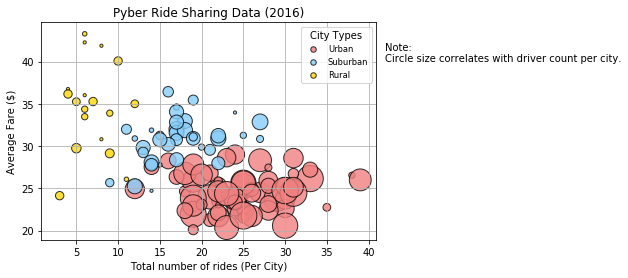

In [17]:
#Group the data by city for each type
grp_urban=merge_data.loc[merge_data['type']=="Urban",:].groupby(merge_data['city'])
grp_suburban=merge_data.loc[merge_data['type']=="Suburban",:].groupby(merge_data['city'])
grp_rural=merge_data.loc[merge_data['type']=="Rural",:].groupby(merge_data['city'])



# Obtain the x and y coordinates and bubble size for each type of city

#Urban
cnt_ride_urban=grp_urban['ride_id'].count()
avg_fare_urban=grp_urban['fare'].mean()
driver_cnt_urban=grp_urban['driver_count'].mean()

#Suburban
cnt_ride_suburban=grp_suburban['ride_id'].count()
avg_fare_suburban=grp_suburban['fare'].mean()
driver_cnt_suburban=grp_suburban['driver_count'].mean()

#Rural
cnt_ride_rural=grp_rural['ride_id'].count()
avg_fare_rural=grp_rural['fare'].mean()
driver_cnt_rural=grp_rural['driver_count'].mean()



# Build the bubble plot
fig, bubble = plt.subplots()
bubble.scatter(cnt_ride_urban,avg_fare_urban,s=driver_cnt_urban*10,color='lightcoral',
               edgecolor='black',label='Urban',alpha=0.8)
bubble.scatter(cnt_ride_suburban,avg_fare_suburban,s=driver_cnt_suburban*10,color='lightskyblue',
               edgecolor='black',label='Suburban',alpha=0.8)
bubble.scatter(cnt_ride_rural,avg_fare_rural,s=driver_cnt_rural*10,color='gold',
               edgecolor='black',label='Rural',alpha=0.8)



# Incorporate the other graph properties
bubble.set_xlabel("Total number of rides (Per City)")
bubble.set_ylabel("Average Fare ($)")
bubble.grid(True)
bubble.set_title("Pyber Ride Sharing Data (2016)")


# Create and format legend
lgnd=plt.legend(loc="best", fontsize="small", fancybox=True,title='City Types')

for i in range(0,3):
 lgnd.legendHandles[i]._sizes = [30] 


# Incorporate a text label regarding circle size
bubble.text(42, 40, 'Note:\nCircle size correlates with driver count per city.')


# Save Figure
plt.savefig("Pyber Ride Sharing_Bubble.png")

# Show plot
plt.show()

In [18]:
# Group by City type for pie chart
grp_type=merge_data.groupby('type')

# Defining colors and labels for all pie charts
colors=['gold','lightskyblue','lightcoral']
explode=[0.05,0.05,0.05]

## Total Fares by City Type

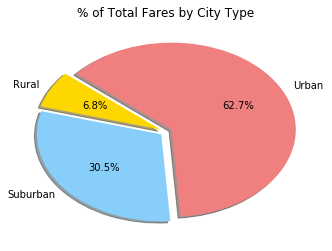

In [19]:
# Calculate Fare Percents
fare_perc=grp_type['fare'].sum()/merge_data['fare'].sum()

# Build and format Pie Chart
fare_pie_plot=fare_perc.plot(kind='pie',colors=colors,autopct="%1.1f%%", shadow=True, startangle=140,
               explode=explode,title='% of Total Fares by City Type')
plt.axes().set_ylabel('')
fare_pie_plot.set_aspect(.7)


# Save Figure
plt.savefig("% of Total Fares by City Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

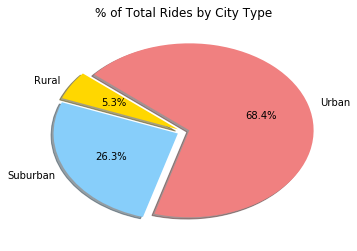

In [20]:
# Calculate Ride Percents
ride_perc=grp_type['ride_id'].count()/merge_data['ride_id'].count()

# Build and format Pie Chart
ride_pie_plot=ride_perc.plot(kind='pie',colors=colors,autopct="%1.1f%%", shadow=True, startangle=140,
               explode=explode,title='% of Total Rides by City Type')
plt.axes().set_ylabel('')
ride_pie_plot.set_aspect(.7)


# Save Figure
plt.savefig("% of Total Rides by City Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

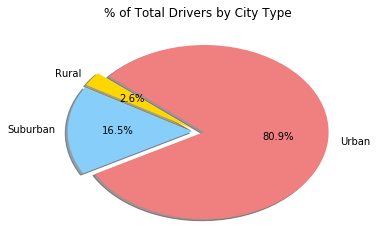

In [21]:
# Calculate Driver Percents
grp_type_city=city_data.groupby('type')

driver_cnt=grp_type_city['driver_count'].sum()

driver_total=city_data['driver_count'].sum()

driver_perc=driver_cnt/driver_total

# # Build and format Pie Chart
driver_pie_plot=driver_perc.plot(kind='pie',colors=colors,autopct="%1.1f%%", shadow=True, startangle=140,
               title='% of Total Drivers by City Type',explode=explode)
plt.axes().set_ylabel('')
driver_pie_plot.set_aspect(.7)


# # Save Figure
plt.savefig("% of Total Drivers by City Type.png")

# # # Show Figure
plt.show()